# Coefficient formulas
M. C. M. Wright, ISVR, University of Southampton

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Overview

So far we've represented sinusoids in two ways:

$$
A\sin(\omega t + \phi) = a\cos\omega t + b \sin\omega t \tag{1}
$$

where $a = A\sin\phi$ and $b = A\cos\phi$, and $A = \sqrt{a^2 + b^2}$ and $\phi = \tan^{-1}b/a$. The representation on the left has the advantage that $A$ and $\phi$ correspond to the amplitude and phase of the sinusoid, which are more useful things to know than the amplitudes of the cosine and sine components. On the other hand, the representation on the right writes the sinusoid as the sum of two orthogonal functions, which makes it easier to calculate the coefficients of the Fourier series for a given periodic signal.

In this notebook we'll use complex numbers to make a third way to write sinusoids and therefore the Fourier series, even though all the signals and sinusoids will remain purely real. This third representation will make the notation for the Fourier series more compact while allowing us to take advantage of the desirable features of both other representation.

## Helices and sinusoids

Euler's formula

$$
\mathrm{e}^{\mathrm{i}\omega t} = \cos \omega t + \mathrm{i}\sin\omega t \tag{2}
$$

(written with $\omega t$ instead of $\theta$) tells us that $\mathrm{e}^{\mathrm{i}\omega t}$ represents a helix in 3D axes where one represents time and the other two represent the complex plane. We can plot that helix quite easily. 

In [2]:
from mpl_toolkits.mplot3d import Axes3D

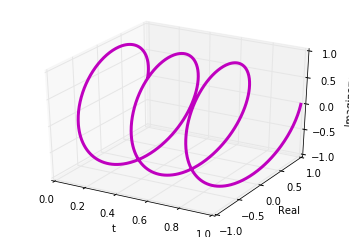

In [3]:
t = linspace(0, 1, 1000) # One second of the signal
f = 3.0                  # Three periods per second
omega = 2*pi*f

f = exp(1j*omega*t)

fig = figure()                 # Create a figure object
ax = fig.gca(projection='3d')  # Set the axes to 3D
ax.plot(t, real(f), imag(f), 'm', linewidth=3)   # Put the plot in the axes
ax.set_xlabel("t")
ax.set_ylabel("Real")
ax.set_zlabel("Imaginary")

The real part of this helix (i.e. viewed from above) is a cosine while the imaginary part (viewed from the side) is a sine. 

#### Exercises
1. Use Euler's formula to show that $\mathrm{e}^{-\mathrm{i}\omega t}$ is the complex conjugate of $\mathrm{e}^{\mathrm{i}\omega t}$.
2. Copy and modify the code cell above to verify that for this particular case.
3. Copy it again and modify it further verify the identity $z + z^* = 2\Re\{z\}$.

If we write $\tilde{c}\mathrm{e}^{\mathrm{i}\omega t}$ where $\tilde{c}$ is some complex number then we can use the modulus of $\tilde{c}$ to adjust the radius of the helix and the argument of $\tilde{c}$ to rotate it about its axis. So with  appropriate choices of $\tilde{c}$ and $\omega$ *any* helix can be represented in this way, as you can (and should) verify by plotting examples. We have the following information:
- Any helix can be written $\tilde{c}\mathrm{e}^{\mathrm{i}\omega t}$.
- Changing the sign of $\omega$ gives the conjugate (and changes the handedness of the helix).
- Adding a complex number to its conjugate gives a real number.
- The real part of a helix is a sinusoid.

So $\tilde{c}\mathrm{e}^{\mathrm{i}\omega t}$ is a helix, and $\left(\tilde{c}\mathrm{e}^{\mathrm{i}\omega t}\right)^*$ is another helix of the same pitch (distance between turns) but the opposite handedness. And adding these together would give a real sinusoid, whose amplitude and phase will depend on $\tilde{c}$, which could be represented in either of our other two forms, so

$$
\tilde{c}\mathrm{e}^{\mathrm{i}\omega t} + \left(\tilde{c}\mathrm{e}^{\mathrm{i}\omega t}\right)^* = a \cos\omega t + b \sin\omega t = A \sin(\omega t + \phi), \tag{3}
$$

but we also have

$$
\begin{align}
\tilde{c}\mathrm{e}^{\mathrm{i}\omega t} + \left(\tilde{c}\mathrm{e}^{\mathrm{i}\omega t}\right)^* &= \tilde{c}\mathrm{e}^{\mathrm{i}\omega t} + \tilde{c}^*\left(\mathrm{e}^{\mathrm{i}\omega t}\right)^* \\
&= \tilde{c}\mathrm{e}^{\mathrm{i}\omega t} + \tilde{c}^*\mathrm{e}^{-\mathrm{i}\omega t}, \tag{4}
\end{align}
$$

so

$$
\tilde{c}\mathrm{e}^{\mathrm{i}\omega t} + \tilde{c}^*\mathrm{e}^{-\mathrm{i}\omega t} = a \cos\omega t + b \sin\omega t = A \sin(\omega t + \phi), \tag{5}
$$

where

$$
\tilde{c} = {\textstyle\frac{1}{2}}(a - \mathrm{i}b) = \frac{A}{2\mathrm{i}}\mathrm{e}^{\mathrm{i}\phi} \tag{6}
$$

#### Exercise
Derive the identities in $(6)$ and confirm them with plotted examples of the three equivalent forms in $(5)$.

### Complex Fourier series

The Fourier series we've used so far is written

$$
y(t) = \frac{1}{2} a_0 + \sum_{n=1}^\infty \left[ 
a_n\cos\left(\frac{2\pi n t}{T}\right) +
b_n\sin\left(\frac{2\pi n t}{T}\right) \right]. \tag{7}
$$

with coefficients $a_n$ and $b_n$  given by

$$
a_n = \frac{2}{T}\int_q^{q+T} y(t)\cos\left(\frac{2\pi nt}{T}\right)\,\mathrm{d}t,\quad
b_n = \frac{2}{T}\int_q^{q+T} y(t)\sin\left(\frac{2\pi nt}{T}\right)\,\mathrm{d}t. \tag{8a, b}
$$


If we define $\tilde{c}_n = \frac{1}{2}(a_n - \mathrm{i}b_n)$ for $n > 0$ and $\tilde{c}_{-n} = \tilde{c}_n^* = \frac{1}{2}(a_n +\mathrm{i}b_n)$, and $\tilde{c}_0 = a_0/2$, then we can write

$$
y(t) = \sum_{n = -\infty}^\infty \tilde{c}_n \mathrm{e}^{2\pi \mathrm{i}n t/T}. \tag{9}
$$

The coefficients $\tilde{c}_n$ are given by 

$$
\tilde{c}_n = \frac{1}{T}\int_q^{q+T} y(t) \mathrm{e}^{-2\pi \mathrm{i}n t/T}\,\mathrm{d}t. \tag{10}
$$

#### Exercises
1. Repeat the calculation of the Fourier series for a sawtooth wave from the previous notebook using $(9)$ and $(10)$ instead of $(7)$ and $(8)$.
2. Confirm that with the definitions given for $\tilde{c}_n$ above, $(9)$ and $(10)$ are equivalent to $(7)$ and $(8)$.
